## 神经网络基本骨架 nn.Module的使用

https://pytorch.org/docs/stable/nn.html#containers

In [1]:
import torch
from torch import  nn

class Model_1(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self,input):
        output = input +1
        return  output

model = Model_1()

x = torch.tensor(1.0)
output = model(x)

print(output)

tensor(2.)


forward函数会默认调用call方法，所以直接model(x)可以直接调用forward方法。

forward方法就是向前传播。从input到output的过程。


## 卷积层

torch.nn.functional.conv2d()

    - input
    - weight:就是卷积核size
    - stride :卷积核间距
    - padding: 外边框，相当于就是在原输入矩阵的外面加上外边框，然后再进行卷积操作。
  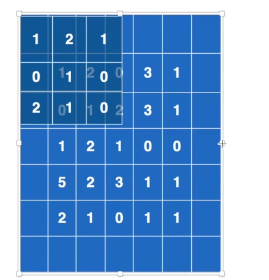
**torch.nn.Conv2d()**

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

官方文档看参数

    - in_channels(int) :输入通道
    - out_channels(int) ： 输出通道 比如in_channels=1,out_channels=2时，会有两个卷积核
    - kernel_size ：传入int(默认成为对应size值相同）或者tuple。
    - padding
    - dilation :卷积核的spacing。  （空洞卷积）
   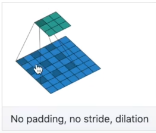
    
    关于这些的概念，官方文档有link https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md对应图示
    
nn掌握就行，nn.functional与nn类似。




- $Input: (N, C_{in}, H_{in}, W_{in})or(C_{in}, H_{in}, W_{in})$

- $Output: (N, C_{out}, H_{out}, W_{out}) or (C_{out}, H_{out}, W_{out}), where $  

注 N：batch_size; C:channel;H:height;W:width

$$H_{out} = \left\lfloor\frac{H_{in} + 2 \times \text{padding}[0] - \text{dilation}[0] \times (\text{kernel_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor
 $$
 $$W_{out} = \left\lfloor\frac{W_{in} + 2 \times \text{padding}[1] - \text{dilation}[1] \times (\text{kernel_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$
 
 
 **通过这个公式复现论文时可以推导出一些参数**


In [ ]:
import torch
import torchvision
from torch import  nn
from torch.nn import Conv2d
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("dataset/",train=False,transform=torchvision.transforms.ToTensor(),download=
                                      True)
dataloader  = DataLoader(dataset,batch_size=64)


class Model_conv(nn.Module):
    def __init__(self):
        super(Model_conv, self).__init__()
        self.conv1 = Conv2d(in_channels=3,out_channels=3,kernel_size=3,stride=1,padding=0)
    def forward(self,x):
        x = self.conv1(x)
        return  x

model = Model_conv()
print(model)
# writer = SummaryWriter("conv2d")
step = 0
for data in dataloader:
    imgs,target = data
    print(imgs.shape)
#     writer.add_images("input", imgs, step)
    output = model(imgs)
    print(output.shape)
    
#     writer.add_images("output",output,step)
    step+=1
    
writer.close()

In [12]:
# !tensorboard --logdir=conv2d --port=6006


^C


## 最大池化层

池化函数使用某一位置的相邻输出的总体统计特征来代替网络在该位置的输出，本质是降采样，可以大幅减少网络的参数量。

保留输入特征的同时，减少数据量。

torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

- kernel_size: 传入int(默认成为对应size值相同）或者tuple
- stride :默认与kernel_dize一样大
- padding
- cell_mode: True=>ceil模式；False=>floor模式

    ceil向上取整；floor向下取整。

    如图示情况，ceil模式会保留不满3*3的结果，而floor会丢弃
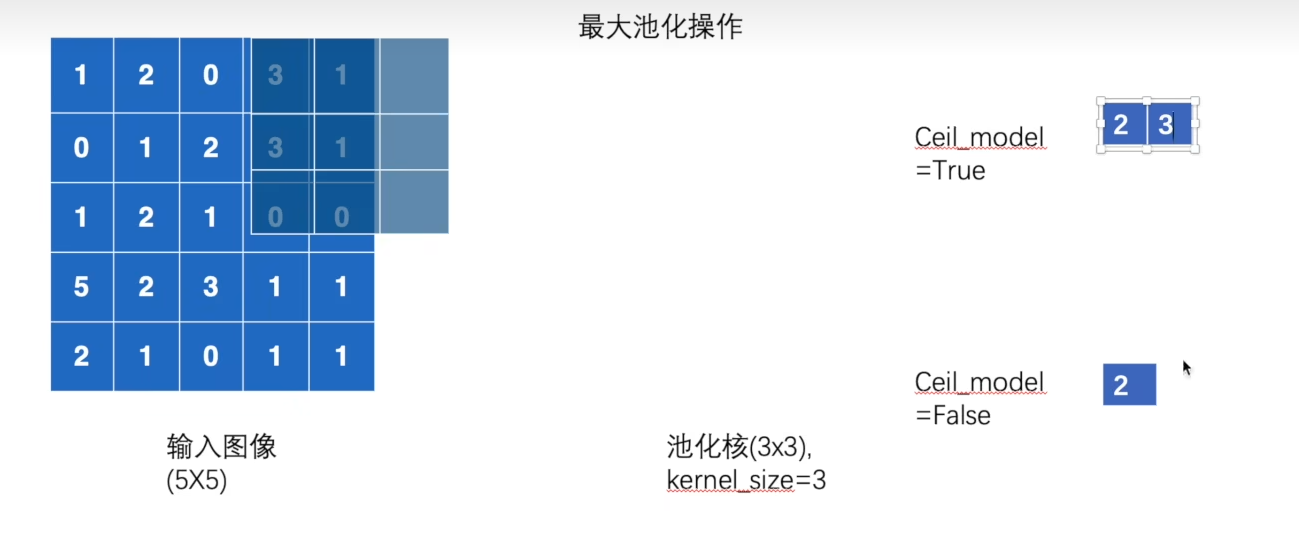

最大池化会取kernel覆盖区域的最大一个值，如上图，第一个3*3中，最大为2。

In [15]:
import torch
from torch import  nn
from torch.nn import MaxPool2d

input = torch.tensor(
    [[1,2,0,3,1],
    [0,1,2,3,1],
    [1,2,1,0,0],
    [5,2,3,1,1],
    [2,1,0,1,1]],dtype=torch.float32
)

input = torch.reshape(input,(-1,1,5,5))
print(input.shape)


class Model_maxpool(nn.Module):
    def __init__(self):
        super(Model_maxpool, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3,ceil_mode=True)

    def forward(self,input):
        output = self.maxpool1(input)
        return  output

model = Model_maxpool()
output = model(input)
print(output)

torch.Size([1, 1, 5, 5])
tensor([[[[2., 3.],
          [5., 1.]]]])


In [18]:
import torch
import torchvision
from torch import  nn
from torch.nn import MaxPool2d
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)
dataloader = DataLoader(dataset,batch_size=64)


class Model_maxpool(nn.Module):
    def __init__(self):
        super(Model_maxpool, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3,ceil_mode=True)

    def forward(self,input):
        output = self.maxpool1(input)
        return  output

model = Model_maxpool()

writer = SummaryWriter("logs")
step=0
for data in dataloader:
    imgs,target = data
    writer.add_images("input_maxpool",imgs,step)
    output = model(imgs)
    writer.add_images("output_maxpool",output,step)
    step+=1

writer.close()


Files already downloaded and verified


In [19]:
!tensorboard --logdir=logs --port=6006

^C


## 非线性激活

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

- reLu
- sigmoid 
等

inplace:

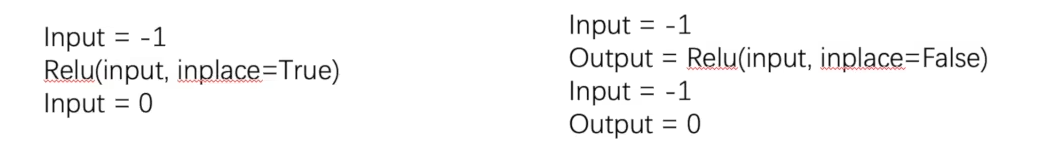

一般情况建议采用False，保存原有的input

## 线性层和其它层

- 正则化层 nn.BatchNorm2d()

    - num_features
 https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d
 
- RNN相关层


- 线性层：nn.Linear
   - in_features
   - out_features
   - bias

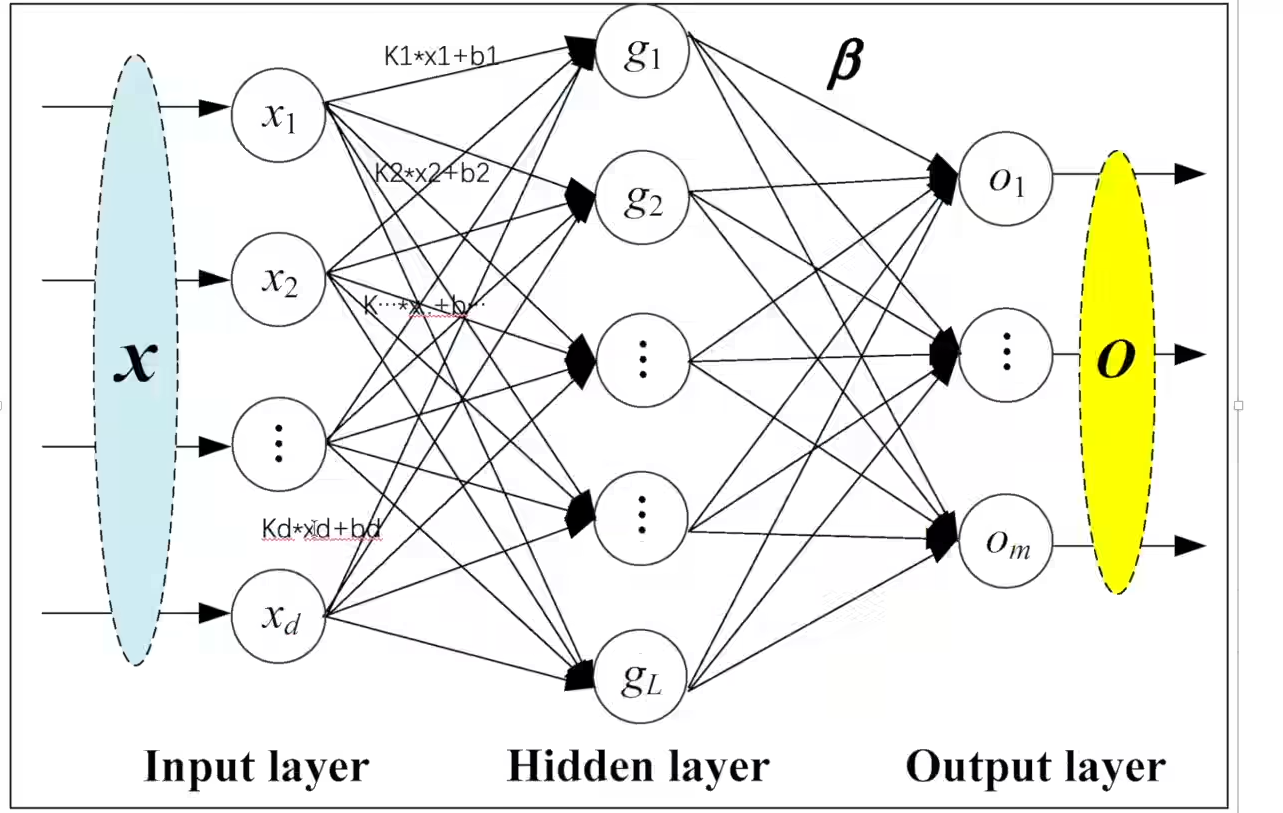

- dropout 层


    

In [ ]:
import torch
import torchvision
from torch import  nn
from torch.nn import MaxPool2d, Linear
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)
dataloader = DataLoader(dataset,batch_size=64)


class Model_Linear(nn.Module):
    def __init__(self):
        super(Model_Linear, self).__init__()
        self.linear1 = Linear(196608,10)

    def forward(self,input):
        output = self.linear1(input)
        return  output

model = Model_Linear()

for data in dataloader:
    imgs,target = data
   
    output = torch.flatten(imgs)
    print(output.shape)

    output = model(output)
    print(output.shape)



## 网络搭建 sequential

CIFAR10 model:

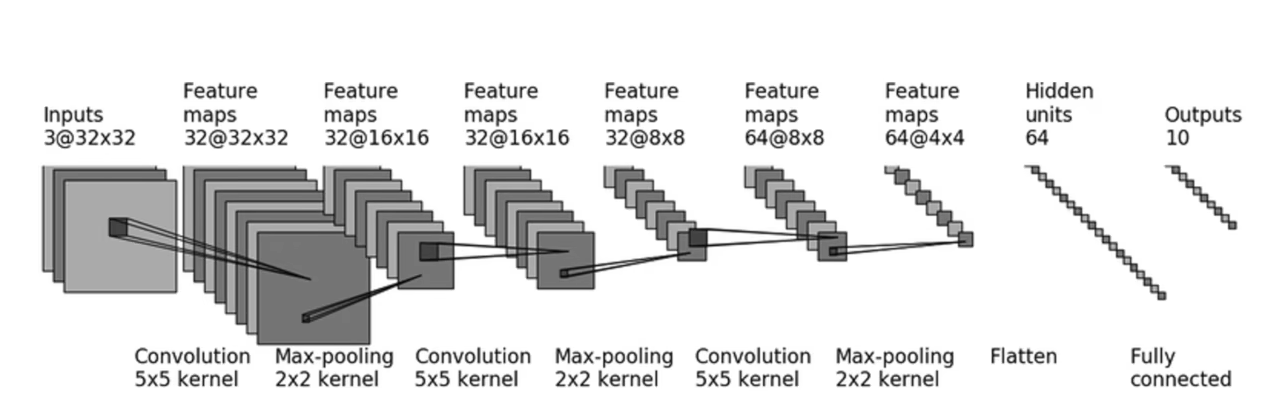

原始写法

In [25]:
import torch
from torch import nn
from torch.nn import Conv2d, MaxPool2d, Linear


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv2d1 = Conv2d(3,32,kernel_size=5,padding=2)
        self.maxpool1 = MaxPool2d(2)
        self.conv2d2 = Conv2d(32,32,5,padding=2)
        self.maxpool2 = MaxPool2d(2)
        self.conv2d3 = Conv2d(32,64,5,padding=2)
        self.maxpool3 = MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.linear1 = Linear(1024,64)
        self.linear2 = Linear(64,10)
    def forward(self,x):
        x = self.conv2d1(x)
        x = self.maxpool1(x)
        x = self.conv2d2(x)
        x = self.maxpool2(x)
        x = self.conv2d3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.linear2(x)
        return x
model = Model()
print(model)

##想要手动验证一下模型：
## 传入torch.ones，获取output，查看output的shape正确性
# input = torch.ones(64,3,32,32)
# output = model(input)
# print(output.shape)

##另外，直接到flatten层的话可以直接看到linear层之前的shape



Model(
  (conv2d1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1024, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)


Sequential

In [ ]:
import torch
from torch import nn
from torch.nn import Conv2d, MaxPool2d, Linear, Sequential


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model1 = Sequential(
            Conv2d(3, 32, kernel_size=5, padding=2),
            MaxPool2d(2),
            Conv2d(32, 32, 5, padding=2),
            MaxPool2d(2),
            Conv2d(32, 64, 5, padding=2),
            MaxPool2d(2),
            nn.Flatten(),
            Linear(1024, 64),
            Linear(64, 10)
        )
    def forward(self,x):
        x = self.model1(x)
        return x
model = Model()
print(model)

可视化tensorboard
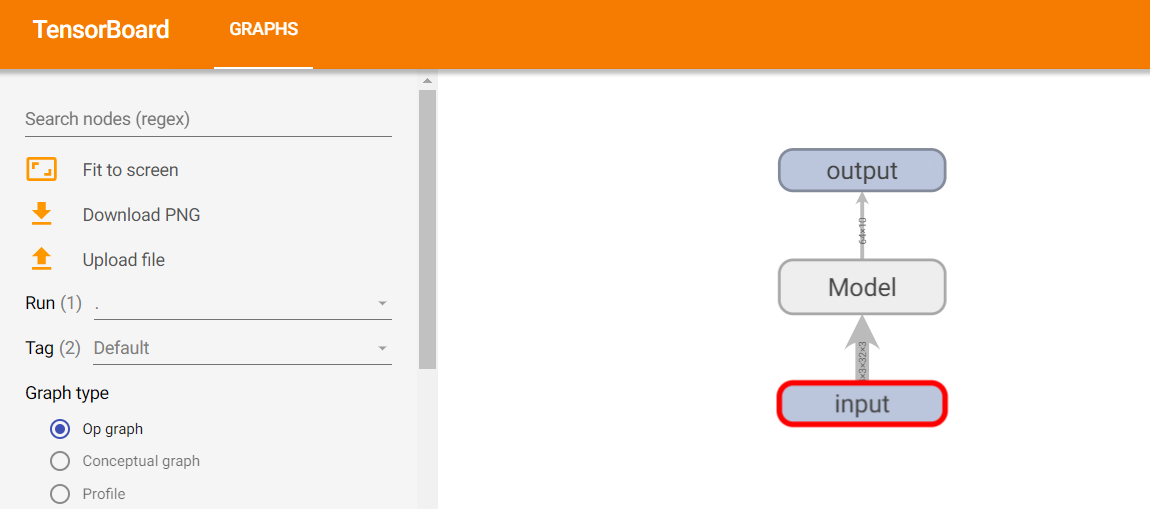

In [ ]:
import torch
from torch import nn
from torch.nn import Conv2d, MaxPool2d, Linear, Sequential
from torch.utils.tensorboard import SummaryWriter


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model1 = Sequential(
            Conv2d(3, 32, kernel_size=5, padding=2),
            MaxPool2d(2),
            Conv2d(32, 32, 5, padding=2),
            MaxPool2d(2),
            Conv2d(32, 64, 5, padding=2),
            MaxPool2d(2),
            nn.Flatten(),
            Linear(1024, 64),
            Linear(64, 10)
        )
    def forward(self,x):
        x = self.model1(x)
        return x
model = Model()
print(model)

##想要手动验证一下模型：
## 传入torch.ones，获取output，查看output的shape正确性
input = torch.ones(64,3,32,32)
output = model(input)
print(output.shape)

writer = SummaryWriter("logs_seq")
writer.add_graph(model,input)
writer.close()
